## Understanding Kathmandu's Wealth: Visualizing Census Data

Statistically speaking, Nepal is a poor country. It ranks 180/222 in terms of GDP per capita [1](https://www.cia.gov/the-world-factbook/field/real-gdp-per-capita/country-comparison/), ranking well behind other post-conflict nations of Kosovo(132) and Laos (153). 76.2% of the adult population is literate [2](https://censusnepal.cbs.gov.np/results/literacy) and 41.9% of households sleep under roofs of galvanized tin sheets [3](https://censusnepal.cbs.gov.np/results/household).

![Roofs](../img/roofs.png)Almost 42% of the Nation's populations lives in housing made out of galvanized steel. Source: 2021 Nepal Census

However, such reality seems extremely far away in the capital city of Kathmandu where Teslas frequent the roads. Kathmandu's prosperity isn't new and stems from a list of historic and geographic factors. Situated at 4.6K ft above sea level, the Kathmandu valley is a large swath of fertile flatland in Himalayan Range where steep topography made agriculture very difficult[4](https://www.fao.org/4/t0706e/T0706E01.htm). Due to this geographic advantange, the region has been continously settled for at least 2000 years [5](https://www.nepalhikingteam.com/origin-of-kathmandu-valley). The large settlements attracted more people and soon Kathmandu found itself as an important trading hub, linking the India-Tibet land route [6](https://www.asiasocietymuseum.com/buddhist_trade/himalaya_nepal.html). Kings built roads, waterworks, and schools; merchants traded gold, spices and silk; while pilgrims spread art, region and philosophy. Consequentialy, Kathmandu and its residents grew rich while its surrounding countryside languished into subsistence farming.

We can see Kathmandu's regional dominance displayed clearly in its 2021 Census data[7](https://censusnepal.cbs.gov.np/results/downloads/ward?type=data). A comprehensive decinnial survey, the 2021 census is the most recent and most representative data on Nepal's socioeconomic factors. Key metrics such as number of households and their associated wealth quintile is present at the municipal ward level in excel format. While the data is not spatial, it is possible to use data cleaning methods to convert them. This report hence marks the first spatial exploration of the Nepal census data.

### Wrangling The Data

To begin my analysis, I first load the ward level shapefiles for Kathmandu valley into my environment. No public GIS data exists on political boundaries—however, in its absence, civillians have taken up charge on digitizing hence. All spatial files in this analysis is thanks to the hard work of Kiran Joshi, whose blog can be found [here](https://sites.google.com/view/maze215/home?authuser=0).

What is coloquially known as "Kathmandu" is in reality three cities. Legend says that three sons divided their father's kingdom into three parts to rule equally, creating the three cities of Kathmandu, Lalitpur, and Bhaktapur. But in spirit and in function, these cities work as one. Hence, my analysis will start by calling and combining the three shapefiles.

In [1]:
import geopandas as gpd
import pandas as pd

ktm = gpd.read_file('../data/sfs/Kathmandu/Kathmandu.shp')
bkt = gpd.read_file('../data/sfs/Bhaktapur/Bhaktapur.shp')
ltp = gpd.read_file('../data/sfs/Lalitpur/Lalitpur.shp')

cities = pd.concat([ktm, bkt, ltp])

#cleaning up the center columnm as it contains neighbourhood name information
cities['Center'] = cities['Center'].str.replace(' Office$', '', regex=True)

cities.head()

OBJECTID    State  State_Code   District  Protected      Mun_Name  \
0      3707  Bagmati           3  KATHMANDU        NaN  Gokarneshwor   
1      3708  Bagmati           3  KATHMANDU        NaN  Gokarneshwor   
2      3709  Bagmati           3  KATHMANDU        NaN  Gokarneshwor   
3      3710  Bagmati           3  KATHMANDU        NaN  Gokarneshwor   
4      3711  Bagmati           3  KATHMANDU        NaN  Gokarneshwor   

      Mun_Type                     Center  Area_SQKM  Ward_No  \
0  Nagarpalika  Gokarneshwor Municipality     7.0128        3   
1  Nagarpalika  Gokarneshwor Municipality     4.6919        4   
2  Nagarpalika  Gokarneshwor Municipality     1.0760        5   
3  Nagarpalika  Gokarneshwor Municipality     0.5591        6   
4  Nagarpalika  Gokarneshwor Municipality     1.3092        8   

                                            geometry  
0  POLYGON ((342664.728 3073511.945, 342660.154 3...  
1  POLYGON ((342803.560 3069107.750, 342787.801 3...  
2  POLYGON ((340158.801 3066905.027, 340126.624 3...  
3  POLYGON ((340531.184 3067725.024, 340535.003 3...  
4  POLYGON ((340879.585 3068658.365, 340889.756 3...

Next, I call and clean the Household Income dataset. After a bit of manipulation and cleaning, my final dataframe gives me ward level information on the total number of households, and the number of households that fall under each wealth quintile ranging from 1 to 5 with 1 being the most economically vulnerable households.

In [3]:
hhwealth = pd.read_excel('../data/census/HHwealth.xlsx')

#creating new names for income quartiles
colnnames = [
    'prov', 'dist', 'gapa', 'name', 'ward', 'tot_hh',
    'quart1_count', 'quart2_count', 'quart3_count', 'quart4_count', 'quart5_count',
    'quart1_%', 'quart2_%', 'quart3_%', 'quart4_%', 'quart5_%'
]

#dropping unnecesary values
hhwealth = hhwealth.iloc[3:].reset_index(drop=True)
hhwealth.columns = colnnames

#dataset contains random text values interrupting wards, hence removing such rows
numeric_columns = [col for col in hhwealth.columns if col != 'name']
for col in numeric_columns:
    hhwealth[col] = pd.to_numeric(hhwealth[col], errors='coerce')

#only selecting the observations for the three municipal districts
valhhwealth = hhwealth[hhwealth['dist'].isin([28, 29, 30])]

valhhwealth.head()

prov  dist  gapa                       name  ward  tot_hh  quart1_count  \
453     3    28     0                 Kathmandu    NaN  542892          2038   
454     3    28     1  Shankharapur Municipality   NaN    7140           376   
455     3    28     1  Shankharapur Municipality   1.0     867            83   
456     3    28     1  Shankharapur Municipality   2.0     426            65   
457     3    28     1  Shankharapur Municipality   3.0     589            36   

     quart2_count  quart3_count  quart4_count  quart5_count  quart1_%  \
453         11398         39406        175348        314702      0.38   
454           874          1676          2129          2085      5.27   
455           106           334           255            89      9.57   
456            98           161            69            33     15.26   
457            92           156           174           131      6.11   

     quart2_%  quart3_%  quart4_%  quart5_%  
453      2.10      7.26     32.30     57.97  
454     12.24     23.47     29.82     29.20  
455     12.23     38.52     29.41     10.27  
456     23.00     37.79     16.20      7.75  
457     15.62     26.49     29.54     22.24

As there are no spatial geometries present in the municipal data, we would want to join the census infomation to our ward-level map by the name of the municipality and their corresponding ward. But, having been phonetically converted to English, they are not spelled the same way across the dataset. Additionally, the data also contains unnecesary (and unstandardized) descriptors such as "Municipality", "Nagarpalika" which will inhibit a join.

To address these issues, I remove all unneeded suffixes and match my datasets using a fuzzy criteria. Two neighbourhoods are considered the same if their names are up to 80% similar.

In [5]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

#helper function to clean names
def clean_name(name):
    name = name.strip()
    suffs = [
        ' Municipality',
        ' Metropolitian City', 
        ' Metropolitan City',
        ' Mahanagarpalika',
        ' Nagarpalika',
        ' Nagarpalika VDC',
        ' Mun',
        ' Gabisa Karyalaya',
        ' Gabisa Bhawan',
        ' Gaunpalika',
        ' Sub Metro'
    ]
    clean = name
    for suffix in suffs:
        if clean.endswith(suffix):
            clean = clean[:-len(suffix)].strip()
    
    return clean

# Cleaning the column containing municipality information
cities['Municipality'] = cities['Mun_Name'].apply(clean_name)
valhhwealth['Municipality'] = valhhwealth['name'].apply(clean_name)

# fuzzy matching accoridng to cleaned names
def find_match(name, choices, min_score=80):
    best_match = process.extractOne(name, choices)
    if best_match and best_match[1] >= min_score:
        return best_match[0]
    return None

# creating a mapping column of fuzzy matched names
name_mapping = {}
for name in cities['Municipality'].unique():
    match = find_match(name, valhhwealth['Municipality'].unique())
    if match:
        name_mapping[name] = match

#adding those to the dataset
cities['new_name'] = cities['Municipality'].map(name_mapping)

# joining my census data to the spatial files
cities_inc = pd.merge(cities, 
                     valhhwealth,
                     left_on=['new_name', 'Ward_No'],
                     right_on=['Municipality', 'ward'],
                     how='left')

#finally, converting my data to WGS84
cities_inc = cities_inc.to_crs('EPSG:4326')

/var/folders/mm/m098rbs1529c7x072qh31ncw0000gn/T/ipykernel_96790/2053149582.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valhhwealth['Municipality'] = valhhwealth['name'].apply(clean_name)


We can see Kathmandu's settlement patterns immediately by plotting the spread of houses. Here, wards near the center of the city have significantly higher number of households than wards comprising the surorunding hills. The large variance in values presents problem with scaling the data. Hence, to address this issue, we would need to decide our city limits.

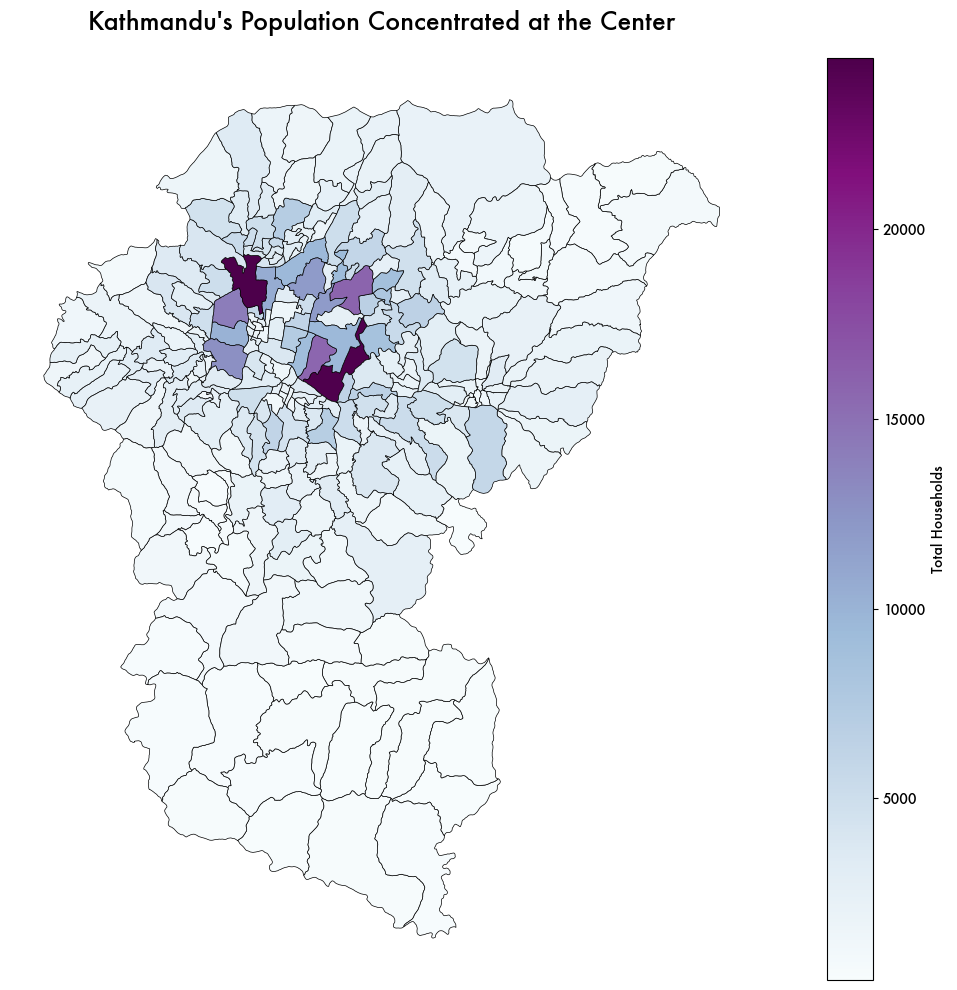

In [101]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_facecolor('ivory')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Futura']

plot = cities_inc.plot(ax=ax, 
    column='tot_hh',
    cmap='BuPu',
    edgecolor='black',
    linewidth=0.5,
    legend=True,
    legend_kwds={'label': 'Total Households'}
)

ax.set_title("Kathmandu's Population Concentrated at the Center", 
    size=18, 
    pad=20
)
ax.set_axis_off()

plt.tight_layout()

### Setting Limits for Kathmandu

Our analysis will not be very useful if we include sparsely populated hill wards in our dataset. Our study area needs to have tigher city limits—for this purpose I use a road density based selection criteria. Using road network data from Open Street Maps, I calculate the density of streets by area for each ward. I then filter out all wards who fall in the bottom 30th percentile for road density.

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning:

invalid value encountered in buffer

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning:

invalid value encountered in intersects

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning:

invalid value encountered in union

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning:

invalid value encountered in intersects

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning:

invalid value encountered in union



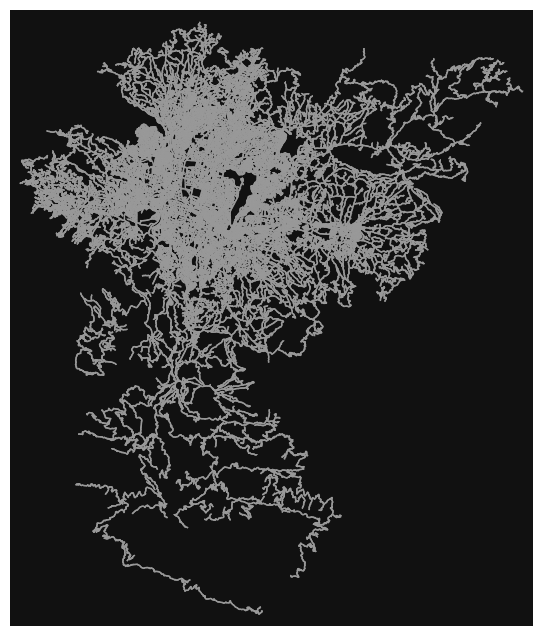

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [102]:
import osmnx as ox
valley = cities_inc.dissolve().make_valid()
street_network = ox.graph_from_polygon(valley.geometry.iloc[0], network_type="drive")
ox.plot_graph(ox.project_graph(street_network), node_size = 0)

The street network map also paints a similar picture—high density of roads near the center before dissapearing in the surrounding hills.

In [128]:
from shapely.geometry import Polygon

#getting street edges
edges = ox.graph_to_gdfs(street_network, edges = True, nodes = False).to_crs(cities_inc.crs)

#counting number of streets per ward
cities_inc['streetcount'] = cities_inc.geometry.apply(
    lambda x: len(edges[edges.intersects(x)])  
)

#creating density metric
cities_inc['streetdensity'] = cities_inc['streetcount']/cities_inc['Area_SQKM']

#selecting 30th quartile threshold
threshold = cities_inc['streetdensity'].quantile(0.30)

#subsetting values
main_city = cities_inc[cities_inc['streetdensity'] >= threshold]

The resulting map shows a much tighter city limits though the issues with scale still presists.

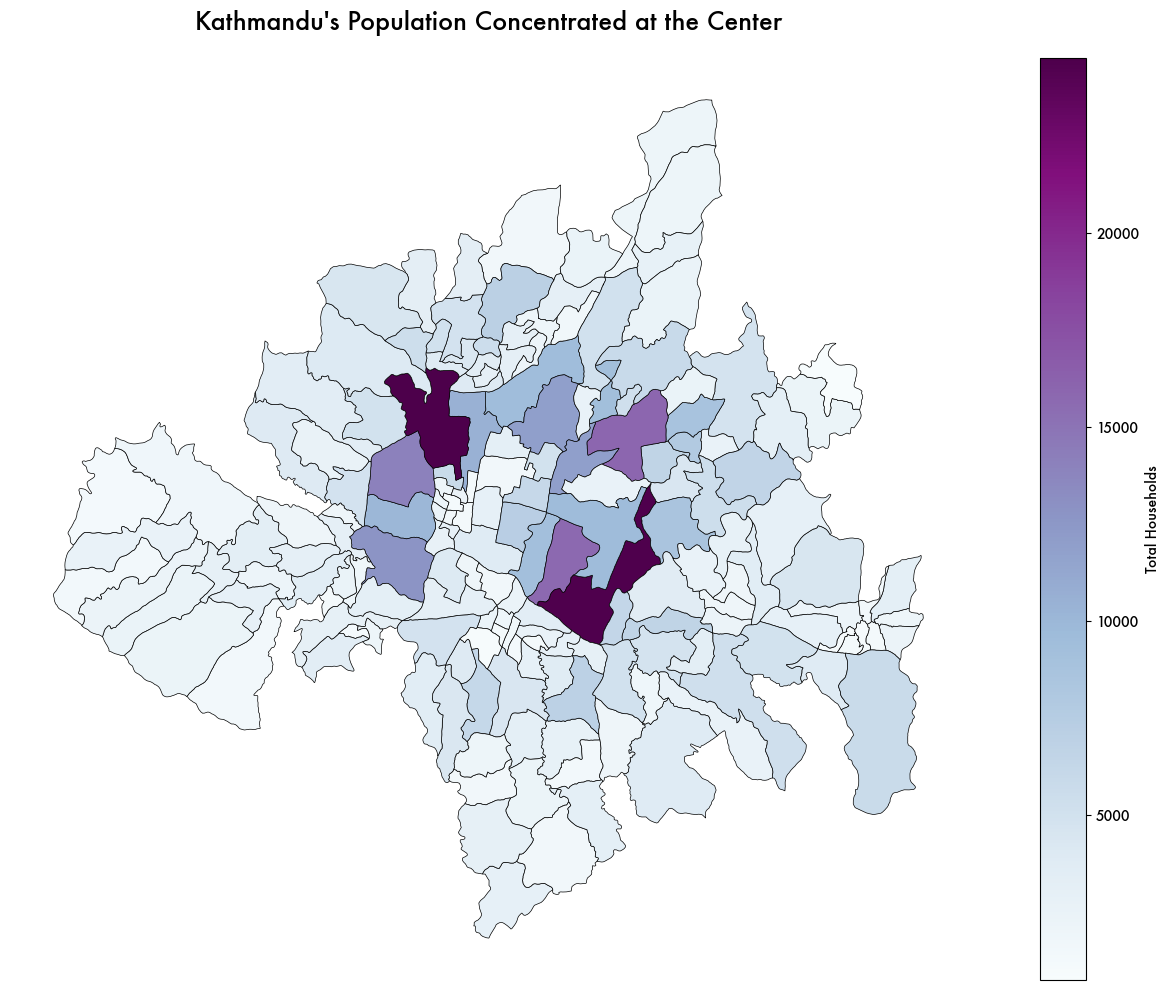

In [129]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_facecolor('ivory')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Futura']

plot = main_city.plot(ax=ax, 
    column='tot_hh',
    cmap='BuPu',
    edgecolor='black',
    linewidth=0.5,
    legend=True,
    legend_kwds={'label': 'Total Households'}
)

ax.set_title("Kathmandu's Population Concentrated at the Center", 
    size=18, 
    pad=20
)
ax.set_axis_off()

plt.tight_layout()

Logging our total number of households gives us a better picture. Here, we see conspicous pockets of empty space surrounded by a growing belt of dense settlements. There are three empty cores—each corresponding to the historic city centers of Kathmandu, Lalitpur, and Bhaktapur. While many variations exist, this does match the "donut-shape" typology of city settlement.

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



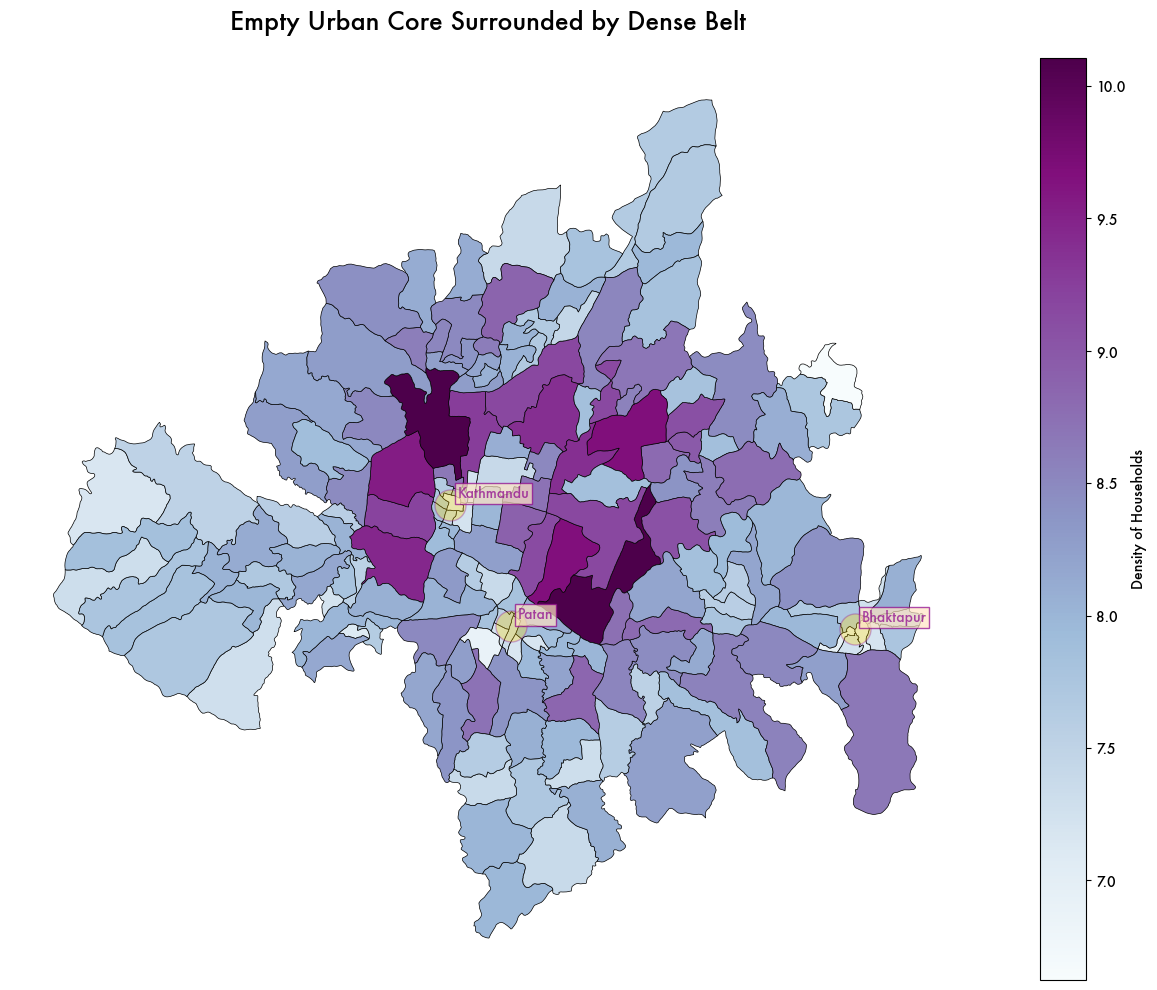

In [130]:
from shapely.geometry import Point
#  Creating a gdf of historic city center area
centers = gpd.GeoDataFrame(
    {
        'name': ['Kathmandu', 'Patan', 'Bhaktapur'],
        'geometry': [
            Point(85.30727341768024, 27.705040937390145),
            Point(85.32530690762836, 27.672831546274733),
            Point(85.42829510275436, 27.672202975996818)
        ]
    },
    crs='EPSG:4326'
)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_facecolor('ivory')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Futura']

main_city['log_hh'] = np.log(main_city['tot_hh'])

main_city.plot(ax=ax, 
    column='log_hh',
    cmap='BuPu',
    edgecolor='black',
    linewidth=0.5,
    legend=True,
    legend_kwds={'label': 'Density of Households'}
)

centers.plot(ax=ax,
           color="gold",
           edgecolor='darkmagenta',
           alpha=0.3,
           markersize=500)  # Increase dot size

for idx, row in centers.iterrows():
   ax.annotate(row['name'], 
               xy=(row.geometry.x, row.geometry.y),
               color='darkmagenta',
               bbox=dict(
                  facecolor='bisque',
                  edgecolor='darkmagenta',
                  alpha=0.7,
                  pad=2
                  ),
               alpha=0.7,
               xytext=(5, 5), 
               textcoords='offset points')

ax.set_title("Empty Urban Core Surrounded by Dense Belt", 
    size=18, 
    pad=20
)
ax.set_axis_off()

plt.tight_layout()

### Exploring Wealth Quatintiles in the City
How does the population distribution transform to wealth quantiles? To understand this, I created a folium map where the percentage of households in Lowest and Highest Income Quartiles is shown over a map of Kathmandu. This map visually corresponds to how I understand wealth in the city:

* Richest Areas are in South part of the city (corresponding to areas with a lot of INGO offices), and distant suburban hills. 
* Areas near the core have some of the lowest incidence of high income households in the city.
* Distribution of lowest quantiles doesn't tell us much as most residents of Kathmandu are fall under the richer quantiles compared to the rest of Nepal. However, we do notice that presence of households in the lowest quantile increases rapidly once we enter the hills in the western parrt of the city.

In [131]:
import folium
m = main_city.explore(
    column='quart5_%',
    legend=True,
    cmap='viridis',
    name='Highest Income',
    tooltip=['name', 'ward', 'quart5_%', 'quart4_%', 'quart3_%', 'quart2_%','quart1_%']
)
main_city.explore(
    column='quart1_%',
    cmap='inferno',
    name='Lowest Income',
    m=m ,
    tooltip=['name', 'ward', 'quart5_%', 'quart4_%', 'quart3_%', 'quart2_%','quart1_%']
)

folium.LayerControl().add_to(m)

m

We can explore the distribution of households belonging to different quartiles below. Following our initial assumptions about the relative prosperty of Kathmandu, the city center only starts showing a higher concentration of households starting from quartile 3, the middle income quartile.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
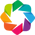

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning:

invalid value encountered in buffer

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning:

invalid value encountered in intersection

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning:

invalid value encountered in buffer

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning:

invalid value encountered in buffer

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning:

invalid value encountered in buffer

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:1

BokehModel(combine_events=True, render_bundle={'docs_json': {'9d0a66b7-f809-412c-9a2e-957211c01c2c': {'version…

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning:

invalid value encountered in buffer

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning:

invalid value encountered in buffer

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning:

invalid value encountered in buffer

/opt/homebrew/Caskroom/mambaforge/base/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning:

invalid value encountered in buffer



In [132]:
import hvplot.pandas
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

plot1 = main_city.melt(
    id_vars=["OBJECTID", "geometry"],
    value_vars=['quart5_%', 'quart4_%', 'quart3_%', 'quart2_%','quart1_%'],
    var_name="Quintile",
    value_name="Percentage"
)


plot1.hvplot(geo=True, 
             c='Percentage', 
             alpha=0.45, 
             groupby='Quintile',
             widget_location='left_top',
             color_key='viridis',
             tiles='OSM',
             tiles_opts={'alpha': 0.5})

### Estimating Median Income

Though the census data doesn't provide us with information on median household income, it is possible to estimate this data using other publicly available government data. The National Statistics Office has information on the median and mean income values for each quartile available on their [website](https://data.nsonepal.gov.np/dataset/b6c3c19b-4b15-44bf-8653-1571e76dad14/resource/d711c2a1-2f5c-47a6-be02-bb4073fe234d?inner_span=True). Using the median income value for each quartile, we estimated the median income for each ward depending on their composition of households. 

In [144]:
plot2 = main_city.copy()

med_inc = {
    'quart1': 242797,  
    'quart2': 299341,  
    'quart3': 377000,
    'quart4': 465301,  
    'quart5': 617882  
}

plot2['Est Income'] = (
    plot2['quart1_count'] * med_inc['quart1'] +
    plot2['quart2_count'] * med_inc['quart2'] +
    plot2['quart3_count'] * med_inc['quart3'] +
    plot2['quart4_count'] * med_inc['quart4'] +
    plot2['quart5_count'] * med_inc['quart5']
) / plot2[['quart1_count', 'quart5_count', 'quart3_count', 
        'quart4_count', 'quart5_count']].sum(axis=1)


plot2['Est Income'] = pd.to_numeric((plot2['Est Income'])/100000).round(1)

We then plot our distribution. Here, income is given in 100k Nepali Rupees per year. The data shows two rings of high income wards in the city.

In [149]:
import altair as alt

alt.Chart(plot2).mark_geoshape(
    stroke='white',
    strokeWidth=0.5
).encode(
    color=alt.Color('Est Income:Q', 
        scale=alt.Scale(scheme='viridis'),
        title='Annual Income (Lakhs NRP)'),
    tooltip=['Mun_Name:N', 'ward:N','Est Income:Q']
).properties(
    width=800,
    height=600,
    title='Two Rings of High Income Settlements in the City'
)

alt.Chart(...)

### Mapping Kathmandu's Poverty
Kathmandu is a mixed-income city where the rich live alongside (sometimes as stay-in landlords of) the poor. However, this does't mean that every ward in the city is made up of the same composition of households. I am interested in learning more about the spatial distribution of low-income households. 

However, the information provided by the census doesn't help much in the context of Kathmandu. As living costs in the city are so much higher than rest of the country, a person in the middle quartile elsewhere may find themselves being nominally low income. Hence to account for such dynamics, we combine the lowest 3 quartiles to make a single, "Low Income" catagory of the city.

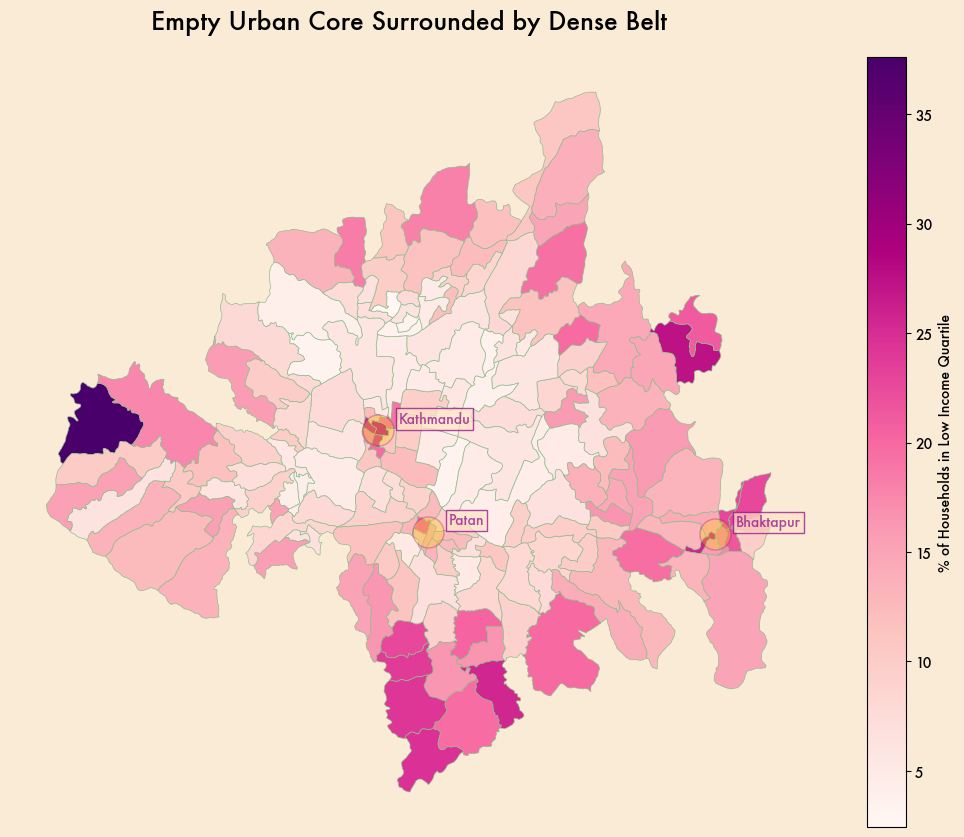

In [154]:
plot3 = main_city.copy()
plot3['Low Income'] = plot3[['quart1_%', 'quart2_%', 'quart3_%']].sum(axis=1)

fig, ax = plt.subplots(figsize=(15, 10), facecolor='antiquewhite')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Futura']

plot3.plot(ax=ax, column='Low Income', 
          cmap='RdPu',
          edgecolor='darkseagreen',
          linewidth=0.5,
          legend=True,
          legend_kwds={'label': '% of Households in Low Income Quartile',
                      'orientation': 'vertical'}) 



centers.plot(ax=ax,
           color="gold",
           edgecolor='darkmagenta',
           alpha=0.3,
           markersize=500) 

for idx, row in centers.iterrows():
   ax.annotate(row['name'], 
               xy=(row.geometry.x, row.geometry.y),
               color='darkmagenta',
               bbox=dict(
                  facecolor='bisque',
                  edgecolor='darkmagenta',
                  alpha=0.7,
                  pad=2
                  ),
               alpha=0.7,
               xytext=(15, 5), 
               textcoords='offset points')

ax.set_title("Concentration of Poverty in Historic Cores", 
    size=18, 
    pad=20
)
ax.set_axis_off()